<a href="https://colab.research.google.com/github/JoDeMiro/DeepLearningIntroduction/blob/main/Basic_Image_Studies_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Megvilágosodás

Irhattam volna csupa nagybetűvel is.

Két kísérlet jutott eszembe, de lehet, hogy csak az egyiket fogom megcsinálni, mindenesetre röggtön két frameworkben. Kerasban és Scikit Learnben. Ha már nagyon jó leszek akkor megcsinálom PyTorchban.

Nos a megvilágosodás.

Vegyük a két alapesetet.

Osztályozás (ahogy én szeretem hívni klasszifikáció) és regresszó.

Nézzük a következő esetet. Van két darab (igen 2 db) képünk.

Szeretnénk megtanítani egy algoritmusnak, hogy tudjon különbséget tenni a két kép között. Kismillió módszer létezik, de most vegyünk egy neurális hálót. Az egyszerűség kedvéért legyen egy nem túl nagy négyzetes kép egyenló oldal hosszúsággal.

Hogyan tanítjuk fel két kép alapján a neurális hálót?

Leginkább sehogyan, de ha mégis akkor gondoljok végig magának a tanulásnak a folyamatát. A Backprop vagyis az Error Backprop és a Gradiesn Descent a hiba alapján működik.

Nos két kép esetén mi lesz a hiba?

A tanítás során a következő lehetőségek lépnek fel.
1. egyszerre egy képet adunk oda egy iterációban, ezalapján kiszámolja a hibát és módosít a rendszeren.
2. mindkét képet odaadjuk egy iteráció során. Ekkor vagy minkettőt helyesen klasszifikálja, vagy egyiket, vagy másikat helyesen klasszifikálja, de olyan nincs, hogy egyiket sem klasszifikálja helyesen. Tegyük fel, hogy Binary Classification-ról van szó.

Nos akkor nézzük meg, hogy ezekben az esetekben, hogyan szökkenthető a hiba?

Hogyan csökkenthető, ha összesen két, vagy három kimenete van?

Tegyük hozzá, hogy maga a hiba nem dichotom, hanem SoftMax esetén egy folytonos változó.!



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [3]:
%%capture
!rm *.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png

In [4]:
import skimage.io
import skimage.transform

In [5]:
pic1 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

print(type(pic1))

print(pic1.shape)

red1   = pic1[:, :, 0]
green1 = pic1[:, :, 1]
blue1  = pic1[:, :, 2]

<class 'numpy.ndarray'>
(400, 610, 3)


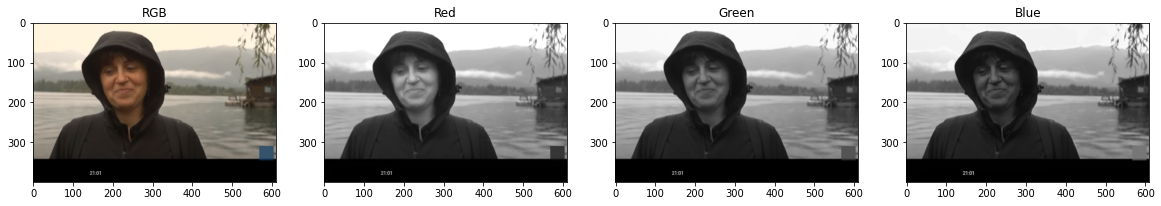

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic1, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red1, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green1, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue1, cmap='gray'); ax4.set_title('Blue')

plt.show()

In [7]:
pic2 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

print(type(pic2))

print(pic2.shape)

red2   = pic2[:, :, 0]
green2 = pic2[:, :, 1]
blue2  = pic2[:, :, 2]

<class 'numpy.ndarray'>
(400, 610, 3)


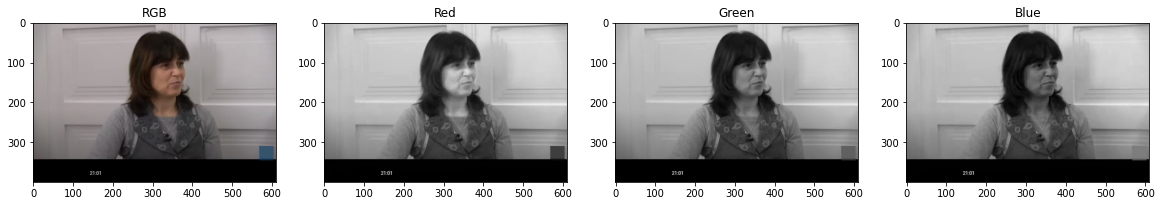

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic2, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red2, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green2, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue2, cmap='gray'); ax4.set_title('Blue')

plt.show()

In [9]:
def get_picture(file = 'https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png'):
  pic = skimage.io.imread(file)

  print(type(pic))
  print(pic.shape)

  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  return pic, red, green, blue


def show_irgb(pic):
  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('RGB')
  ax2.imshow(red, cmap='gray'); ax2.set_title('Red')
  ax3.imshow(green, cmap='gray'); ax3.set_title('Green')
  ax4.imshow(blue, cmap='gray'); ax4.set_title('Blue')

  plt.show()

def show_gray(pic):
  fig, (ax1) = plt.subplots(1, 1, figsize=(5, 8))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('Gray')

  plt.show()

def crop_img(pic, x, y, w, h):
  red_   = pic[y:y+h, x:x+w, 0]
  green_ = pic[y:y+h, x:x+w, 1]
  blue_  = pic[y:y+h, x:x+w, 2]
  pic_   = pic[y:y+h, x:x+w, :]

  return pic_, red_, green_, blue_

def resize_img(pic, w, h):
  pic_ = skimage.transform.resize(pic, (w, h))

  red_   = pic_[:, :, 0]
  green_ = pic_[:, :, 1]
  blue_  = pic_[:, :, 2]

  return pic_, red_, green_, blue_

def to_gray_img(pic):

  grey_ = (pic[:, :, 0] + pic[:, :, 1] + pic[:, :, 0])/3

  return grey_


<class 'numpy.ndarray'>
(400, 610, 3)


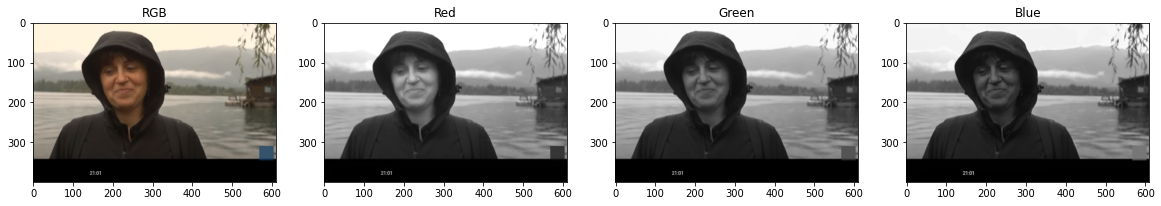

In [10]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

show_irgb(img)

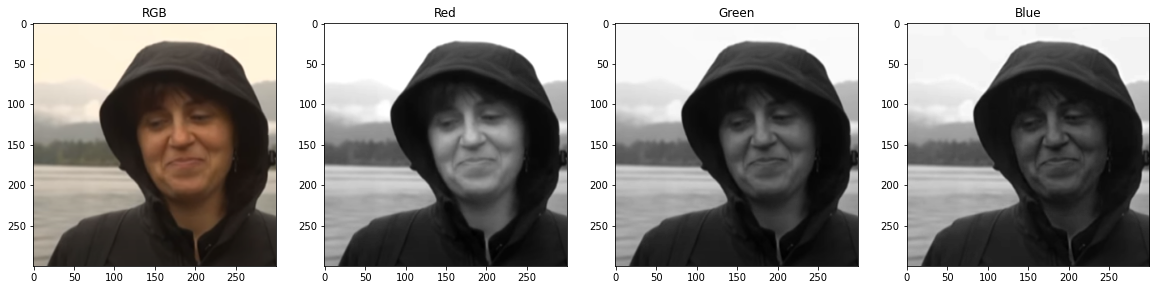

In [11]:
croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

show_irgb(croped_img)


<class 'numpy.ndarray'>
(400, 610, 3)


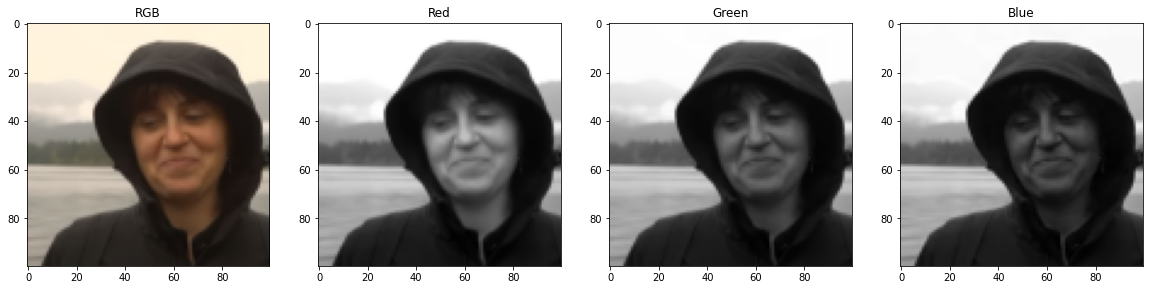

In [12]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

woman1 = resized_img

show_irgb(woman1)

<class 'numpy.ndarray'>
(400, 610, 3)


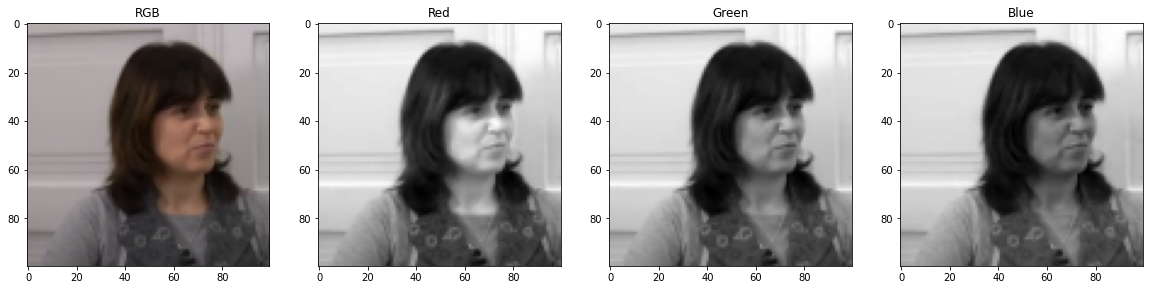

In [13]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

croped_img, _, _, _ = crop_img(img, 140, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

woman2 = resized_img

show_irgb(woman2)

<class 'numpy.ndarray'>
(400, 610, 3)


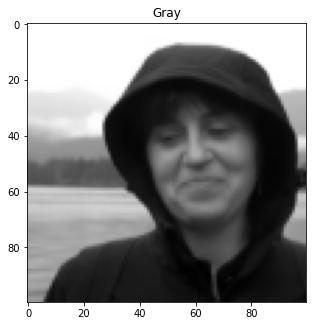

In [14]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

gray_img = to_gray_img(resized_img)

woman1 = gray_img

show_gray(woman1)

<class 'numpy.ndarray'>
(400, 610, 3)


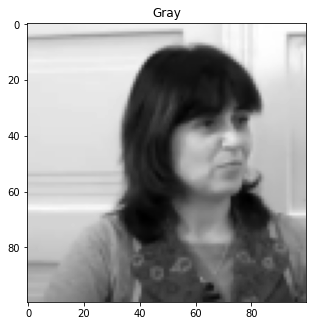

In [15]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

croped_img, _, _, _ = crop_img(img, 140, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

gray_img = to_gray_img(resized_img)

woman2 = gray_img

show_gray(woman2)

# Készítsük elő a tanulásra az adatokat a klasszifikációhoz

Sok sok transzformáció, hogy a gépi tanuláshoz szükséges könyvtárak számára emészthető formába hozzuk.

In [16]:
X1 = woman1.ravel()
X2 = woman2.ravel()

print(X1.shape)
print(X2.shape)

X = np.array([X1, X2])

print(X.shape)

y = np.array([0, 1])

# donthetünk úgy is, hogy One-Hot Encode legyen
one_hot_1 = np.array([1.0, 0.0])
one_hot_2 = np.array([0.0, 1.0])
y = np.array([one_hot_1, one_hot_2])
# vagy simán csak így
y = np.array([np.array([1.0, 0.0]), np.array([0.0, 1.0])])

print(y.shape)

(10000,)
(10000,)
(2, 10000)
(2, 2)


In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ),
                    activation='relu',
                    solver='adam',
                    batch_size=1,
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    max_iter=200,
                    shuffle=False,
                    random_state=1,
                    verbose=0,
                    validation_fraction=0.0,
                    n_iter_no_change=200)

In [18]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

mlp.fit(X, y)

MLPClassifier(batch_size=1, n_iter_no_change=200, random_state=1, shuffle=False,
              validation_fraction=0.0, verbose=0)

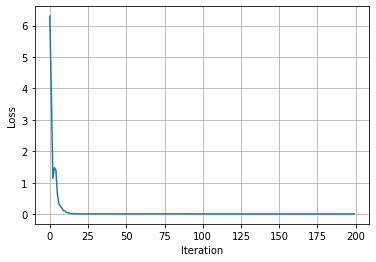

In [19]:
def plot_loss(mlp):
  plt.figure(figsize=(6, 4))
  plt.plot(mlp.loss_curve_)
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.grid()
  plt.show()

plot_loss(mlp)

In [20]:
# Na most jön az, hogy csak a vicc kedvéért nézzük meg, 
# hogy teljeseítene ez a két képen tanított model
# olyan képeken amelyek nagyon hasonlítanak
# az eredeti állapothoz.



In [21]:
# De még mielőtt ebbe belecsapnánk, nézzük meg, hogy ez
# a feltanított scikit model tulajdonképpen hogyan is
# becsül


In [26]:
pred_woman1_y = mlp.predict(X[0].reshape(1, -1))
pred_woman2_y = mlp.predict(X[1].reshape(1, -1))

print(pred_woman1_y)
print(pred_woman2_y)

[[1 0]]
[[0 1]]


In [27]:
# Hát titkon azt reméltem, hogy valamilyen valószínűségeket is ki tudok
# nyerni, de nem így történt.

# Akkor most nézzük a többi képen

In [30]:
%%capture
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman1_test1.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman1_test2.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman1_test3.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman1_test4.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman1_test5.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman1_test6.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman1_test7.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman1_test8.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman1_test9.png

!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman2_test1.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman2_test2.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman2_test3.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman2_test4.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman2_test5.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman2_test6.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman2_test7.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman2_test8.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman2_test9.png


<class 'numpy.ndarray'>
(400, 610, 3)


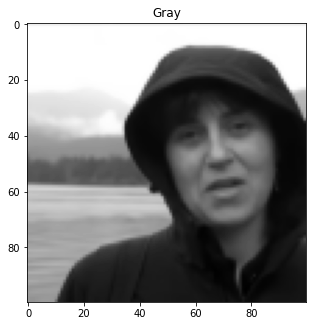

(100, 100)
(1, 10000)
(2, 10000)
(2, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


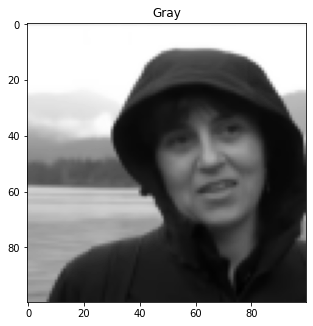

(100, 100)
(1, 10000)
(3, 10000)
(3, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


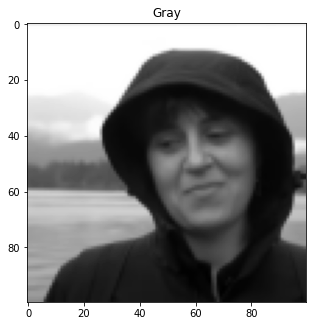

(100, 100)
(1, 10000)
(4, 10000)
(4, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


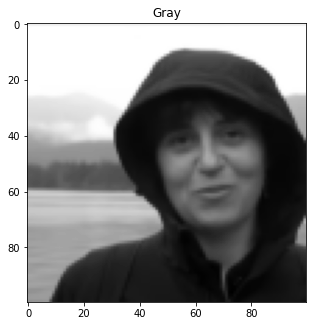

(100, 100)
(1, 10000)
(5, 10000)
(5, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


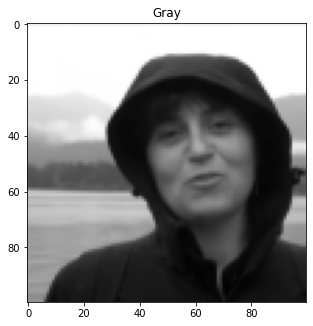

(100, 100)
(1, 10000)
(6, 10000)
(6, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


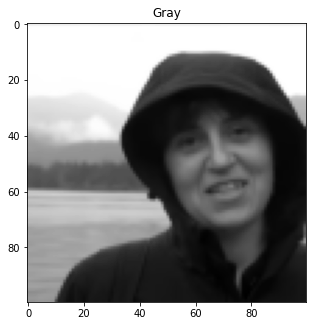

(100, 100)
(1, 10000)
(7, 10000)
(7, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


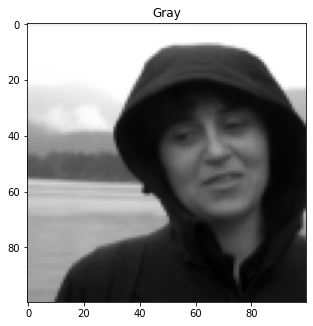

(100, 100)
(1, 10000)
(8, 10000)
(8, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


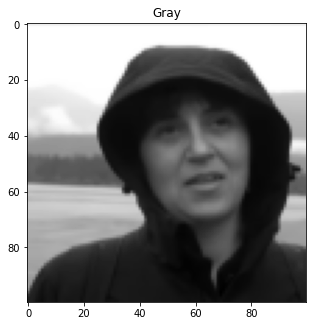

(100, 100)
(1, 10000)
(9, 10000)
(9, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


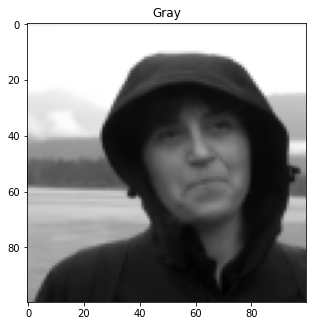

(100, 100)
(1, 10000)
(10, 10000)
(10, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


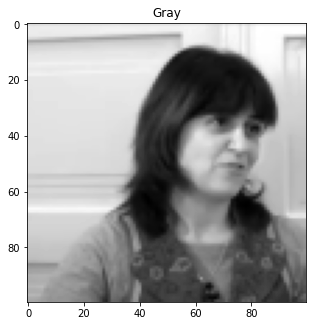

(100, 100)
(1, 10000)
(2, 10000)
(2, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


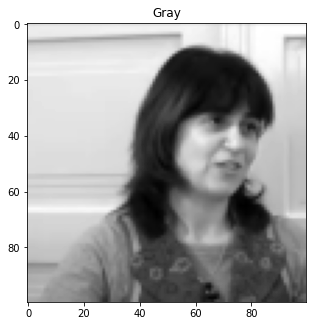

(100, 100)
(1, 10000)
(3, 10000)
(3, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


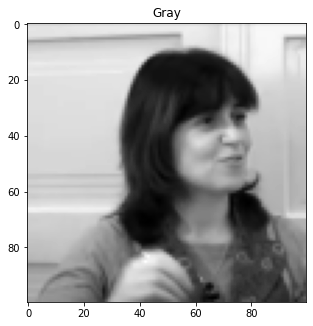

(100, 100)
(1, 10000)
(4, 10000)
(4, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


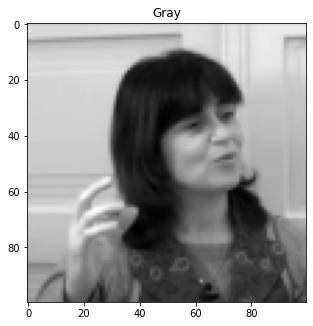

(100, 100)
(1, 10000)
(5, 10000)
(5, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


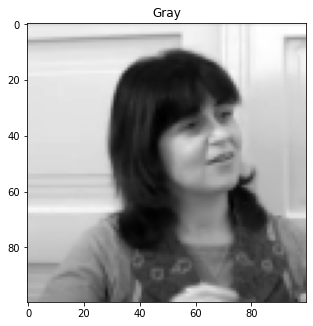

(100, 100)
(1, 10000)
(6, 10000)
(6, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


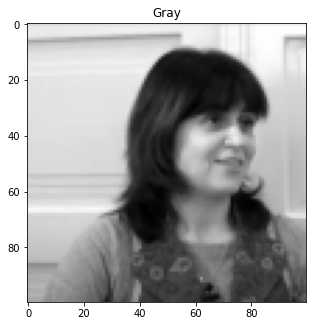

(100, 100)
(1, 10000)
(7, 10000)
(7, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


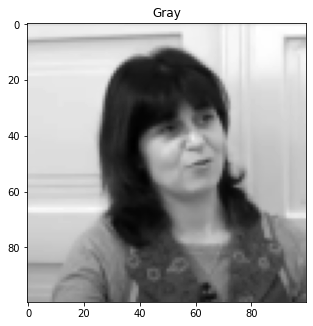

(100, 100)
(1, 10000)
(8, 10000)
(8, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


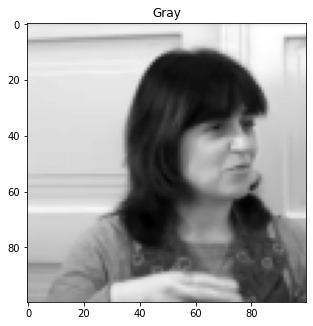

(100, 100)
(1, 10000)
(9, 10000)
(9, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


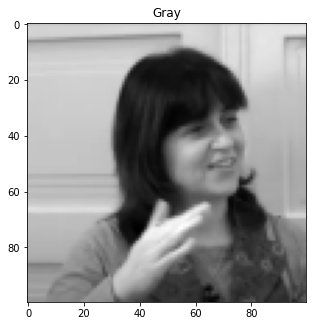

(100, 100)
(1, 10000)
(10, 10000)
(10, 2)
(20, 10000)
(20, 2)


In [61]:
X1_test = np.array([X1])

# Csináljuk meg a kimeneti változót is
one_hot_1 = np.array([1.0, 0.0])
y1_test = np.array([one_hot_1])

for i in range(1, 10):
  filename = 'woman1' + '_test' + str(i) + '.png'
  img, _, _, _ = get_picture(filename)
  croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)
  resized_img, _, _, _, = resize_img(croped_img, 100, 100)
  gray_img = to_gray_img(resized_img)
  woman1_test = gray_img
  show_gray(woman1_test)

  X_ = woman1_test
  print(X_.shape)

  X_ = X_.reshape(1, X_.size)
  print(X_.shape)

  X1_test = np.vstack((X1_test, X_))
  print(X1_test.shape)

  y1_test = np.vstack((y1_test, one_hot_1))
  print(y1_test.shape)


X2_test = np.array([X2])

# Csináljuk meg a kimeneti változót is
one_hot_2 = np.array([0.0, 1.0])
y2_test = np.array([one_hot_2])

for i in range(1, 10):
  filename = 'woman2' + '_test' + str(i) + '.png'
  img, _, _, _ = get_picture(filename)
  croped_img, _, _, _ = crop_img(img, 140, 0, 300, 300)
  resized_img, _, _, _, = resize_img(croped_img, 100, 100)
  gray_img = to_gray_img(resized_img)
  woman2_test = gray_img
  show_gray(woman2_test)

  X_ = woman2_test
  print(X_.shape)

  X_ = X_.reshape(1, X_.size)
  print(X_.shape)

  X2_test = np.vstack((X2_test, X_))
  print(X2_test.shape)

  y2_test = np.vstack((y2_test, one_hot_2))
  print(y2_test.shape)

# Rakjuk össze egy tömbe az X1_test és X2_test
X_test = np.vstack((X1_test, X2_test))
print(X_test.shape)

# Rakjuk össze egy tömbe az y1_test és y2_test
y_test = np.vstack((y1_test, y2_test))
print(y_test.shape)


In [62]:
pred_y_test = mlp.predict(X_test)

In [63]:
pred_y_test

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [49]:
# Hát úgy tűnik, hogy tökéletesen osztályozta a nem látott eseteket is.

# Pórábljuk ki teljesen más jellegű képeken is

In [50]:
%%capture
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman3_test1.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman3_test2.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman3_test3.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman3_test4.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman3_test5.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman3_test6.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman3_test7.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman3_test8.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman3_test9.png

<class 'numpy.ndarray'>
(400, 610, 3)


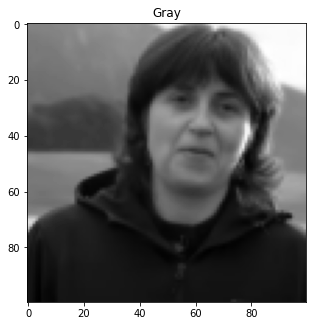

(100, 100)
(1, 10000)
(2, 10000)
(2, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


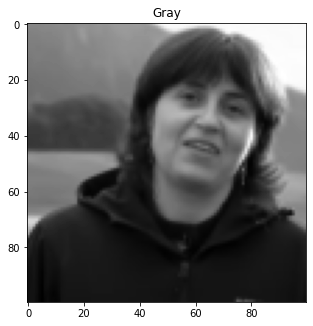

(100, 100)
(1, 10000)
(3, 10000)
(3, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


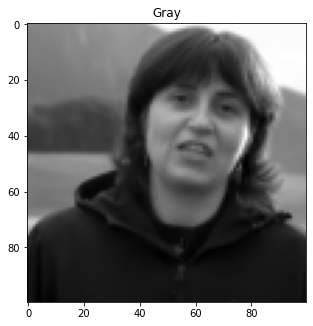

(100, 100)
(1, 10000)
(4, 10000)
(4, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


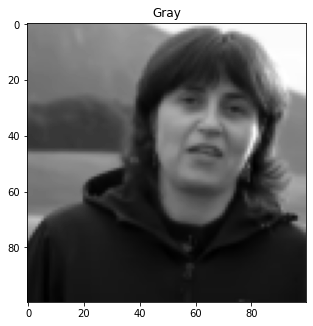

(100, 100)
(1, 10000)
(5, 10000)
(5, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


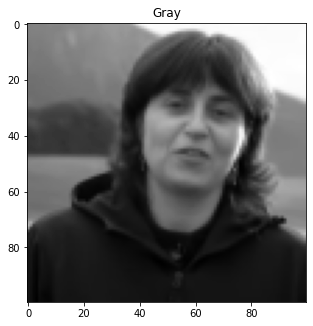

(100, 100)
(1, 10000)
(6, 10000)
(6, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


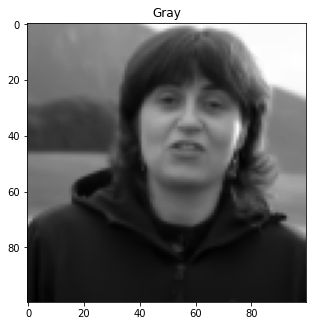

(100, 100)
(1, 10000)
(7, 10000)
(7, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


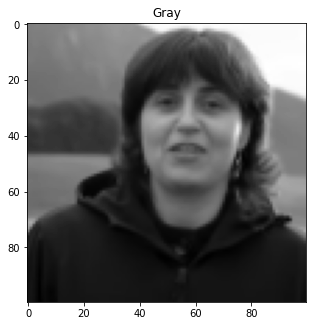

(100, 100)
(1, 10000)
(8, 10000)
(8, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


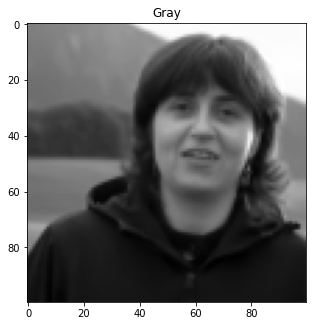

(100, 100)
(1, 10000)
(9, 10000)
(9, 2)
<class 'numpy.ndarray'>
(400, 610, 3)


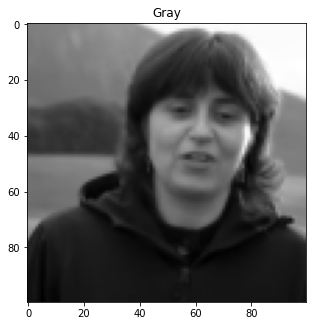

(100, 100)
(1, 10000)
(10, 10000)
(10, 2)
X1_test.shape =  (10, 10000)
X2_test.shape =  (10, 10000)
X3_test.shape =  (10, 10000)
X12_test.shape =  (20, 10000)
X123_test.shape =  (30, 10000)
y123_test.shape =  (30, 2)


In [65]:
X3_test = np.array([X1])          # ----> vigyázat ide X1-et tettem

# Csináljuk meg a kimeneti változót is
one_hot_3 = np.array([0.0, 0.0])  # ----> egyik kategóriába sem tartozik
y3_test = np.array([one_hot_3])

for i in range(1, 10):
  filename = 'woman3' + '_test' + str(i) + '.png'
  img, _, _, _ = get_picture(filename)
  croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)
  resized_img, _, _, _, = resize_img(croped_img, 100, 100)
  gray_img = to_gray_img(resized_img)
  woman3_test = gray_img
  show_gray(woman3_test)

  X_ = woman3_test
  print(X_.shape)

  X_ = X_.reshape(1, X_.size)
  print(X_.shape)

  X3_test = np.vstack((X3_test, X_))
  print(X3_test.shape)

  y3_test = np.vstack((y3_test, one_hot_3))
  print(y3_test.shape)


# Rakjuk össze egy tömbe az X1_test és X2_test és X3_test
print('X1_test.shape = ', X1_test.shape)
print('X2_test.shape = ', X2_test.shape)
print('X3_test.shape = ', X3_test.shape)
X12_test  = np.vstack((X1_test, X2_test))
print('X12_test.shape = ', X12_test.shape)
X123_test = np.vstack((X12_test, X3_test))
print('X123_test.shape = ', X123_test.shape)

# Rakjuk össze egy tömbe az y1_test és y2_test és y3_test
y12_test  = np.vstack((y1_test, y2_test))
y123_test = np.vstack((y12_test, y3_test))
print('y123_test.shape = ', y123_test.shape)


In [67]:
# Most nézzük meg, hogy a két képen feltanított model hogyan teljesít
# ezen a három féle képen

pred_y3_test   = mlp.predict(X3_test)

print(pred_y3_test)

# pred_y123_test = mlp.predict(X123_test)

# print(pred_y123_test)

[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [ ]:
# Hát igen az látszik, hogy azzal a típusú képpel amit egyáltalán nem
# látott a tanulásnál, egyik vagy másik kategóriába rakja

# Mi lenne akkor ha meghagynánk a Classification-t mint osztályozó modlet
# de nem One-Hot Encodolásban adnánk neki oda az adatokat, hanem binárisan

# Bináris (nem One-Hot Encodolással végzett) osztályozás

In [73]:
# Mivel minden adatunk megvan, egyszerűen csak hozzunk létre egy új y-t

y_binary = np.zeros(2)

y_binary[0]  = 0
y_binary[1] = 1

y_binary.shape

# Az eredeti y.shape amúgy (2, 2) [[0.0, 1.0], [1.0, 0.0]]

(2,)

In [76]:
# most tanítsuk ezen az adaton a modelt

# mlp.fit(X, y)

# volt az erdeti One-Hot, ehelyet most legyen ez

mlp.fit(X, y_binary)


MLPClassifier(batch_size=1, n_iter_no_change=200, random_state=1, shuffle=False,
              validation_fraction=0.0, verbose=0)

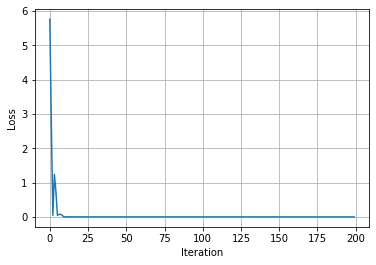

In [77]:
plot_loss(mlp)

In [80]:
# Na akkor nézzük meg, hogy teljesít ez a két adaton feltanított model
# a többi képen

y_test_binary = np.zeros(20)

y_test_binary[0:10]  = 0
y_test_binary[11:20] = 1

print(X12_test.shape)
print(y_test_binary.shape)


(20, 10000)
(20,)


In [81]:
pred_y_test_binary = mlp.predict(X12_test)

In [82]:
pred_y_test_binary

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [84]:
# Hát úgy tűnik, hogy tökéletesen megtalálta az összefüggést,
# de nézzük meg, hogy mit kezd azzal a típusú képpel {3}
# amit egyáltalán nem látott a tanulás során

pred_y3_test_binary = mlp.predict(X3_test)

pred_y123_test_binary = mlp.predict(X123_test)

In [85]:
pred_y3_test_binary

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# Viszonylag szerencsétlenül azt is {2} képhez sorolja
# de ez így helyes, hiszen ebből a két típusú képből
# válogathat hiszen ezen tanítottuk a modelt.
# Vagy {1} vagy {2} mást nem ismer.

# Játszunk a 'batch_size' értékével

In [93]:
# Most evezzünk más vizekre.

# Vegyük elő ismét az eredeti modelt, felejtsük el a harmadik képet.
# És csupán azt vizsgáljuk meg, hogy milyen hatással van a tanulás
# folyamatára és végeredményére, ha batch_siez = 1 helyet
# batch_size = 2.

# A helyzet az, hogy szerencsére a program lekezeli, ha a minta
# elemszámánál nagyobb batch_siez értéket adok meg

# Tehát most azt csináljuk, hogy minden interációnál odaadjuk
# az összes mintát a tanulás során és ezek együttes hibája
# alapján számoljuk a hibát és módosítjuk a súlyokat

In [101]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ),
                    activation='relu',
                    solver='adam',
                    batch_size=2,                     # Ez korábban 1 volt
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    max_iter=100,                     # Elég lesz 100 is
                    shuffle=False,
                    random_state=1,
                    verbose=0,
                    validation_fraction=0.0,
                    n_iter_no_change=200)

In [102]:
mlp.fit(X, y)

MLPClassifier(batch_size=2, max_iter=100, n_iter_no_change=200, random_state=1,
              shuffle=False, validation_fraction=0.0, verbose=0)

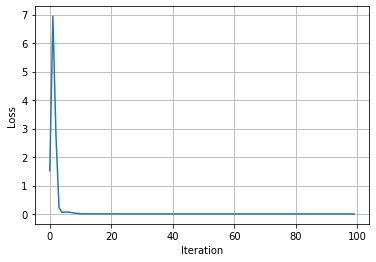

In [103]:
plot_loss(mlp)

In [108]:
experiment = [(1, 'one-hot'), (2, 'one-hot'), (1, 'binary'), (2, 'binary')]

results = []

In [109]:
# Csináljunk erre egy kísérletsorozatot

for setup in experiment:
  print(setup)
  batch_size = setup[0]
  codification = setup[1]

  if( codification == 'one-hot'):
    y_ = y
  if( codification == 'binary'):
    y_ = y_binary

  mlp = MLPClassifier(hidden_layer_sizes=(100, ),
                      activation='relu',
                      solver='adam',
                      batch_size=batch_size,    # <----- variable
                      learning_rate='constant',
                      learning_rate_init=0.001,
                      max_iter=100,
                      shuffle=False,
                      random_state=1,
                      verbose=0,
                      validation_fraction=0.0,
                      n_iter_no_change=200)
  
  mlp.fit(X, y_)

  loss_curve = mlp.loss_curve_

  results.append((setup, loss_curve))

(1, 'one-hot')
(2, 'one-hot')
(1, 'binary')
(2, 'binary')


In [112]:
results[0][0]

(1, 'one-hot')

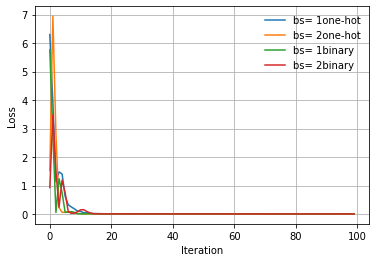

In [117]:
# Most szépen hasonlítsuk össze, hogy alault a tanulási görbe

plt.figure(figsize=(6, 4))
for i in range(len(results)):
  plt.plot(results[i][1], label='bs= ' + str(results[i][0][0]) + results[i][0][1])

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid()
plt.legend(frameon=False)
plt.show()


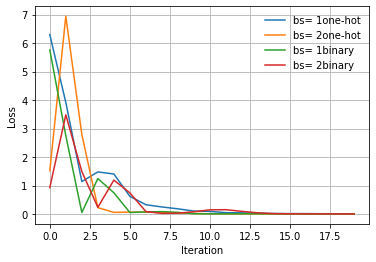

In [118]:
# Most szépen hasonlítsuk össze, hogy alault a tanulási görbe

plt.figure(figsize=(6, 4))
for i in range(len(results)):
  plt.plot(results[i][1][0:20], label='bs= ' + str(results[i][0][0]) + results[i][0][1])

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid()
plt.legend(frameon=False)
plt.show()


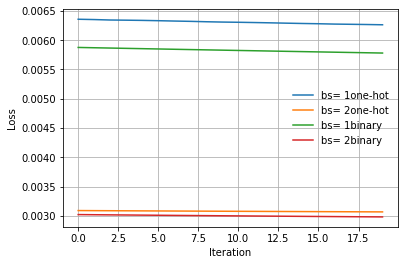

In [120]:
# Most szépen hasonlítsuk össze, hogy alault a tanulási görbe

plt.figure(figsize=(6, 4))
for i in range(len(results)):
  plt.plot(results[i][1][-20:], label='bs= ' + str(results[i][0][0]) + results[i][0][1])

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid()
plt.legend(frameon=False)
plt.show()


In [ ]:
# Az látszik, hogy

# Mivel kétszer annyi adatot kap ha a batch_size = 2 ezért gyorsabban
# is tanul. A fenti ábrán az látszik, hogy függetlenül attól, hogy
# One-Hot vagy Binary a kodólás, ha a batch_size = 2 akkor a hiba
# egy bizonyos idő elteltével fele akkora mint ha a batch_size = 1

# De amúgy ennek nincs különösebb jelentőség, csak kíváncsiságból
# csináltam meg.

In [121]:
# Az eredeti feltételezésem ugyani az volt, hogy csak két minta
# alapján nem fog tudni tanulni, hiszen nem fogja tudni kiszámolni
# a hibát.
# Vagyis az volt a felételezésem, hogy a hiba vagy {0} ha eltalálja
# vagy {0.5} ha az egyik találja el, vagy {1}, ha mindkettőt
# eltalálja.
# Ezzel szemben az derült ki, hogy mivel az utolsó rétegen
# vagy soft-max, vagy binary logistic loss functiont,
# veszteségfüggvényt használ, amelyek [0,1] közötti értéket
# adnak és tényleges érték közötti különbségét számolják,
# pl,. One-Hot esetén [0.21, 0.79] a becsült és [0.0, 1.0]
# tényleges érték esetén a hiba [0.21, 0.21] -> [0.42]
# alapján simán vissza tudja fejteni a hibát.
# pl,. Binary logistic esetén ha [0.21] a becsült és [0.0]
# a tényleges, akkor itt is ki tudja számolni a hibát,
# amit azután visszaterjeszt.

# Csak kiváncsiágból, csináljuk meg MPLRegression osztállyal is

In [122]:
# Ekkor egy dolog biztos, hogy a kimeneti változót nen lehet One-Hot módon kodolni.

# Illetve ez sem biztos mindjárt kipróbáljuk, csak akkor szerintem úgy veszi,
# hogy két kimenete van a modelnek

from sklearn.neural_network import MLPRegressor

In [147]:

  
# Csináljunk erre egy kísérletsorozatot

experiment = [(1, 'one-hot'), (2, 'one-hot'), (1, 'binary'), (2, 'binary')]

results = []


for setup in experiment:
  print(setup)
  batch_size = setup[0]
  codification = setup[1]

  if( codification == 'one-hot'):
    y_ = y
  if( codification == 'binary'):
    y_ = y_binary

  mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, ),
                              activation='relu',
                              solver='adam',
                              batch_size=batch_size,
                              learning_rate='constant',
                              learning_rate_init=0.001,
                              max_iter=100,
                              shuffle=False,
                              random_state=1,
                              verbose=0,
                              validation_fraction=0.0,
                              n_iter_no_change=200)

  
  mlp_regressor.fit(X, y_)

  loss_curve = mlp_regressor.loss_curve_

  results.append((setup, loss_curve))

(1, 'one-hot')
(2, 'one-hot')
(1, 'binary')
(2, 'binary')


In [148]:
# Kíváncsiságból

# Jelenleg az utolsó model Binary encoding

# Hány súly van az utolsó kimeneten

mlp_regressor.coefs_[1].shape

(100, 1)

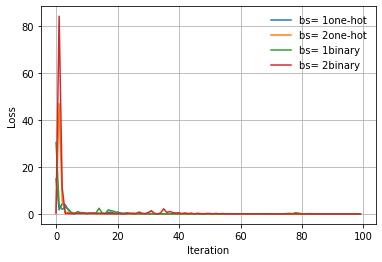

In [124]:
# Most szépen hasonlítsuk össze, hogy alault a tanulási görbe

plt.figure(figsize=(6, 4))
for i in range(len(results)):
  plt.plot(results[i][1], label='bs= ' + str(results[i][0][0]) + results[i][0][1])

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid()
plt.legend(frameon=False)
plt.show()

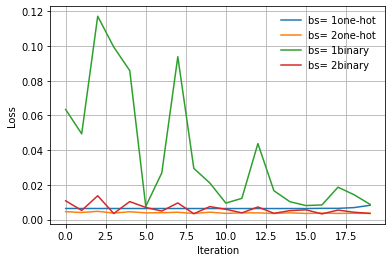

In [127]:
# Most szépen hasonlítsuk össze, hogy alault a tanulási görbe

plt.figure(figsize=(6, 4))
for i in range(len(results)):
  plt.plot(results[i][1][-20:], label='bs= ' + str(results[i][0][0]) + results[i][0][1])

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid()
plt.legend(frameon=False)
plt.show()

In [128]:
# Érdekes, hogy binary kódolás és főként 1 batch esetén hogy ugrál

In [130]:
# Az egyébként érdekelne, hogy néz ki a becslés vagyis a model kimenete

pred_last_model = mlp_regressor.predict(X)

pred_last_model

array([-0.06158597,  0.93960851])

In [131]:
# Fent

# Mivel X két elemű, a két gyári kép, ezért két becsült értékünk van.

# Az is látszik, hogy mivel ez a Binary kódolással volt ezért a
# becslés egy konkrét érték, ami ha 0-hoz van közelebb akkor {0} kategória
# ha 1-hez akkor {1}, de maga a becslés kimenete itt egy folytonos változó
# az MLPClassifier-hez képest ebben mindenféleképen más.

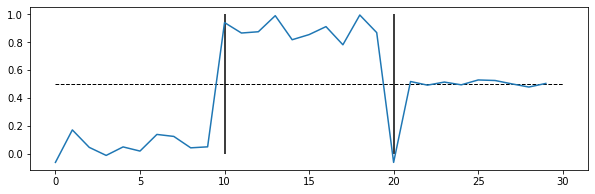

In [139]:
# De nézzük, hogy a többi nem látott képekre milyen becslést ad

pred_last_model = mlp_regressor.predict(X123_test)

pred_last_model

plt.figure(figsize=(10, 3))
plt.plot(pred_last_model)
plt.hlines(0.5, 0, 30, ls='--', lw=1)
plt.vlines(10, 0, 1)
plt.vlines(20, 0, 1)
plt.show()

In [ ]:
# Ha nem érted az ábrát ->

# mlp_regression.predict(X123_test) -> alapján mivel X123_testben az sorrend
# pred_last_model[0:10] -> {0}
# pred_last_model[11:20] -> {1}
# pred_last_model[20:30] -> {2}

# {0}-t és {1}-t jól becsüli, {2}-re nem tanítottuk

# A tanuláság, hogy két értékű y esetén lehet az MLPRegressort is használni
# ahogy sejtettük és tudtuk.

# Kettőnél több érték esetén nem tudunk értlemes kódolást végezni,
# ezért ott ne használjuk és maradjunk az MLPClassifier használatánál.

In [141]:
# Ami még érdekelt volna, hogy One-Hot Encoding esetén hogy működik az MLPRegressor

print(X.shape)
print(y.shape)

mlp_regressor.fit(X, y)

(2, 10000)
(2, 2)


MLPRegressor(batch_size=2, max_iter=100, n_iter_no_change=200, random_state=1,
             shuffle=False, validation_fraction=0.0, verbose=0)

In [142]:
pred_one_hot = mlp_regressor.predict(X)

pred_one_hot

array([[1.00930946, 0.02318026],
       [0.01268077, 1.01490428]])

In [146]:
# Fent

# Ahogy sejtettem, mindkét vekotrra csinált egy becslést!
# Ha most megnézném, hogy hány súly van ebben a modelben
# azt látnám, hogy az utolsó rétegen kétszer annyi súly
# van mert a kimenetet kettő hosszú vektornak veszi
# és nem skalárnak

mlp_regressor.coefs_[1].shape


(100, 2)

# Save and Load model

In [72]:
import pickle

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)



# Visualise net

[  1 100   1]


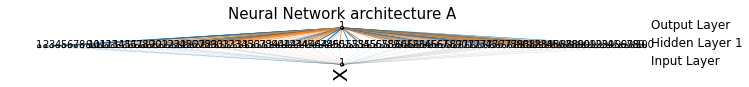

In [70]:
import os

os.system('rm MLPPlot.py')
os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py')

import MLPPlot

num_input_varialbe = ['X']

# Define the structure of the network
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(mlp.hidden_layer_sizes), [1]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, mlp.coefs_, num_input_varialbe)
network.draw()



```
# JoDeMiro
```

